In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
train = pd.read_csv(r"./Data/Result.csv")

In [2]:
def Min_Max_Normalization(feature):
    Data_max = max(train[feature])
    Data_min = min(train[feature])
    return (train[feature]-Data_min)/(Data_max-Data_min)

In [3]:
train['Administrative'] = Min_Max_Normalization('Administrative')
train['Administrative_Duration'] = Min_Max_Normalization('Administrative_Duration')
train['Informational'] = Min_Max_Normalization('Informational')
train['Informational_Duration'] = Min_Max_Normalization('Informational_Duration')
train['ProductRelated'] = Min_Max_Normalization('ProductRelated')
train['ProductRelated_Duration'] = Min_Max_Normalization('ProductRelated_Duration')
train['PageValues'] = Min_Max_Normalization('PageValues') #重要參數

In [4]:
train.describe()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8.093000e+03,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000,8093.000000
mean,4504.263932,0.085543,0.023780,0.020764,0.012826,0.045105,1.476085e-04,0.021816,0.042685,0.019966,0.060447,4.804028,2.236006,7.782899,2.685531,7.668850,1.847399,0.241073,0.157791
std,2599.036923,0.122671,0.052919,0.052439,0.052541,0.063797,1.128933e-02,0.047772,0.047930,0.062328,0.197797,3.174470,1.654740,3.309940,2.668602,3.907616,0.377725,0.427761,0.364567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2246.000000,0.000000,0.000000,0.000000,0.000000,0.009929,3.260174e-07,0.000000,0.014286,0.000000,0.000000,2.000000,1.000000,3.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,4509.000000,0.037037,0.002060,0.000000,0.000000,0.025532,1.062790e-06,0.003205,0.025098,0.000000,0.000000,4.000000,1.000000,10.000000,2.000000,8.000000,2.000000,0.000000,0.000000
75%,6762.000000,0.148148,0.027036,0.000000,0.000000,0.053901,2.594238e-06,0.016923,0.050000,0.000000,0.000000,8.000000,3.000000,10.000000,6.000000,12.000000,2.000000,0.000000,0.000000
max,8999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.200000,0.200000,1.000000,1.000000,9.000000,7.000000,12.000000,8.000000,19.000000,2.000000,1.000000,1.000000


In [5]:
train = train.astype({
    "Month":'category',
    "OperatingSystems":'category',
    "Browser":'category',
    "Region":'category',
    "TrafficType":'category',
    "VisitorType":'category',
    "Weekend":'bool',
    "Revenue":'category'
})

train = train.set_index('ID')
Data = train.drop(["Revenue"], axis=1)
Target = train['Revenue']
X_train, X_test, y_train, y_test = train_test_split(Data, Target,test_size=0.2,random_state=0)

In [6]:
train_pred=[]
test_pred=[]
for i in range(1,20,1):
    clf=svm.SVC(kernel='rbf',C=i/10,gamma='auto')
    clf.fit(X_train,y_train)
    
    pred_train = clf.predict(X_train) 
    pred_test = clf.predict(X_test)
    
    score_tra = metrics.recall_score(y_train,pred_train)
    score_tes = metrics.recall_score(y_test, pred_test)
    
    train_pred.append(score_tra)
    test_pred.append(score_tes)

In [9]:
print(train_pred.index(max(train_pred)))
print(test_pred.index(max(test_pred)))

17
18


In [10]:
clf=svm.SVC(kernel='rbf',C=1.9,gamma='auto')
clf.fit(X_train,y_train)
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

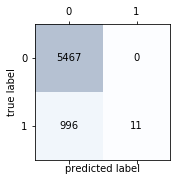

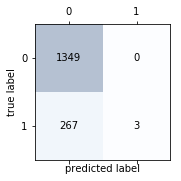

In [11]:
def Plot_confusion(y_true, y_pred):
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.show()
#Train Data
Plot_confusion(y_train, pred_train)

#Test Data
Plot_confusion(y_test, pred_test)

>我選擇使用Min Max Normalization來做Normalization，先直接對數值太大的特徵全部使用，但可以發現這樣的效果顯然不是很好。
><p>我認為PageValues的數字是有意義的，所以在下一步決定PageValues特徵不做Normalization。</p>